## What is Scikit ?
What is it used for ?
***


***

### Red wine quality data set
***


In [45]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is easy-to-use module.
import matplotlib.pyplot as plt

#Data frames
import pandas as pd;

# Fancier, statistical plots.
import seaborn as sns

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

#RandomForestClassifier and AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


#Support Vector Classifier
from sklearn.svm import SVC


#Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
# for error checking
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report 


# Helper functions.
import sklearn.model_selection as mod

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/kekesuke/Emerging-Technologies-Assesment/main/datasets/winequalityN.csv')

***
#### Going throught the data set and checking for any technical information we can gather.
***

In [3]:
# Have a look at the data.
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head() 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# Summary statistics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### As we can see there is valuable technical information we can use later.
***

#### Here we're going to visualize the data, as we know the visualisation is the most powerful tool. We can use it to explain the data.

***

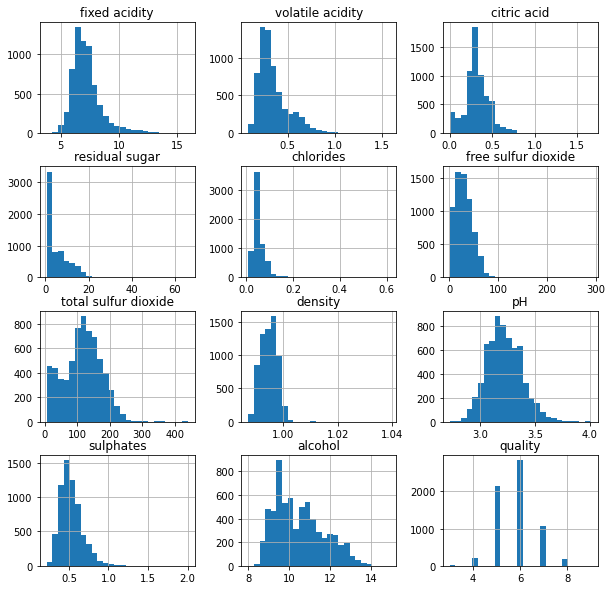

In [7]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

#### The above image reveals how the data is easily distributed on features

### Correlation 
#### We use a statistical method that finds the bonding and relationship between two features.


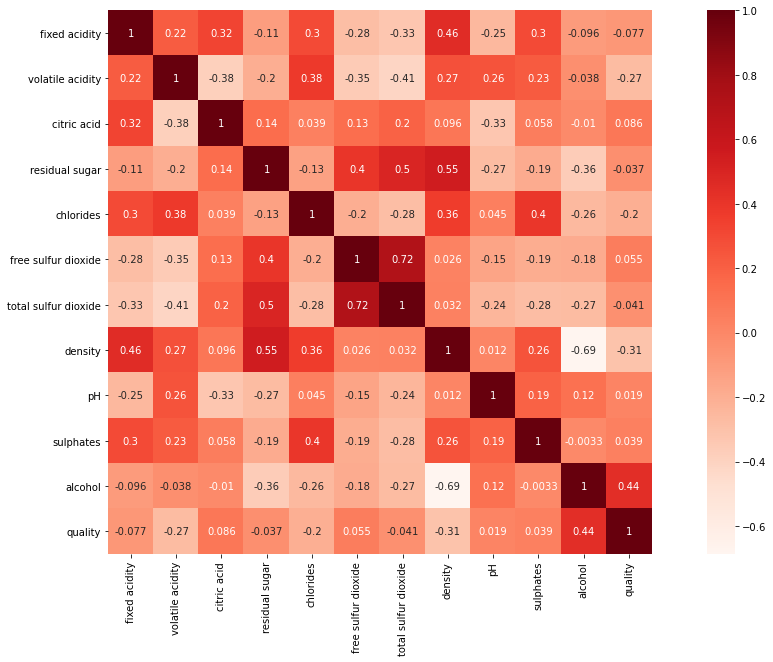

In [8]:
correlation = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Reds')
plt.show()

##### From this correlation visualization, we will find which features are correlated with other features
##### We have to find those features that are fully correlated to each other, because of their relationship that they are equal they are making noise on the model accuracy.

In [9]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [10]:
#We find that the properties that has correlation greater than 0.7 value is total sulfur dioxide so we're going to drop it.
new_df = df.drop('total sulfur dioxide',axis = 1)

In [11]:
# handle our unorganized data.
new_df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [12]:
#We fill all null values with mean values of specific features and directly update the dataset with update() method.
new_df.update(new_df.fillna(new_df.mean()))

In [61]:
# no of categorical columns
cat = new_df.select_dtypes(include='O')
# create dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
#get_dummies functon is used for data manipulation. It converts categorical data into dummy or indicator variables
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [14]:
#We will use classification techniques to fit our model into the dataset for better accuracy
df_dummies['good quality']=[1 if x>=7 else 0 for x in df.quality]
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

We create a program in which if the dependent feature(or propertie ?) “quality”  values are greater than 7 then it will be considered as 1 and if they are less than 7, then we considered it as 0 and this will be store in new created column “good quality”.

In [15]:
# Separate feature variables and target variable
# feature variables
x = df_dummies.drop(['quality','good quality'],axis=1)
# target variable
y = df_dummies['good quality']

## Test and Train Split
***

In [16]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Show some training data.
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white
1916,6.6,0.25,0.36,8.1,0.045,54.0,0.99580,3.08,0.42,9.2,1
947,8.5,0.16,0.35,1.6,0.039,24.0,0.99350,2.96,0.36,10.0,1
877,6.0,0.28,0.34,1.6,0.119,33.0,0.99210,3.19,0.38,10.2,1
2927,7.0,0.31,0.31,9.1,0.036,45.0,0.99216,2.98,0.31,12.0,1
6063,8.5,0.44,0.50,1.9,0.369,15.0,0.99634,3.01,1.10,9.4,0


In [18]:
# Show some testing data.
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white
3103,7.0,0.25,0.45,2.3,0.045,40.0,0.99064,3.16,0.48,11.9,1
1419,7.6,0.14,0.74,1.6,0.040,27.0,0.99160,3.07,0.40,10.8,1
4761,6.2,0.15,0.27,11.0,0.035,46.0,0.99602,3.12,0.38,9.1,1
4690,6.7,0.16,0.32,12.5,0.035,18.0,0.99666,2.88,0.36,9.0,1
4032,6.8,0.27,0.22,17.8,0.034,16.0,0.99890,3.07,0.53,9.2,1


In [32]:
# #We will use the Normalization technique to scale our data because the range in our feature data is high, so this technique will help us to normalize it in range between 0 and 1. 
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


## [Using RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

***

In [20]:
# fit the model
rfc = RandomForestClassifier()
fit_rfc = rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)
x_predict = list(rfc.predict(x_test))

 
# checking the accuracy score
rfc_score = rfc.score(x_test, y_test)
 
print('score of model is : ',rfc_score)
 
print('.................................')
 
print('calculating the error')
 
# checking mean_squared error
MSE = mean_squared_error(y_test, y_predict)
 
# checking root mean squared error
RMSE = np.sqrt(MSE)
 
print('mean squared error is : ',MSE)
 
print('root mean squared error is : ',RMSE)
 
print(classification_report(y_test, x_predict))


score of model is :  0.8738461538461538
.................................
calculating the error
mean squared error is :  0.12615384615384614
root mean squared error is :  0.35518142709585215
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1047
           1       0.81      0.46      0.59       253

    accuracy                           0.87      1300
   macro avg       0.84      0.72      0.76      1300
weighted avg       0.87      0.87      0.86      1300



In [21]:
compare_df = {'predicted':x_predict,'original':y_test}
pd.DataFrame(compare_df).head(10)

,predicted,original
3103,1,1
1419,0,1
4761,0,0
4690,0,0
4032,0,0
1297,0,1
1773,0,0
5584,0,0
561,0,0
5946,0,0


### [Stochastic Gradient Decent Classifier](https://scikit-learn.org/stable/modules/sgd.html)


In [22]:
sgd = lm.SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [23]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1047
           1       0.37      0.05      0.09       253

    accuracy                           0.80      1300
   macro avg       0.59      0.52      0.49      1300
weighted avg       0.72      0.80      0.73      1300



### [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


In [24]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [49]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1047
           1       0.67      0.28      0.40       253

    accuracy                           0.83      1300
   macro avg       0.76      0.63      0.65      1300
weighted avg       0.81      0.83      0.80      1300



### [An AdaBoost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [51]:
#fit the data trough adaboost classifier
adb = AdaBoostClassifier(random_state=1)
adb.fit(x_train, y_train)
y_pred3 = adb.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1047
           1       0.53      0.30      0.38       253

    accuracy                           0.81      1300
   macro avg       0.69      0.62      0.63      1300
weighted avg       0.78      0.81      0.79      1300



### Let's try to increase our accuracy of the models using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [26]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = mod.GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10, verbose = 5, n_jobs=-1)

In [31]:
#May be slow cuz it need to check the matrix
grid_svc.fit(x_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=5)

In [28]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [29]:
#Svc running with best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1047
           1       0.73      0.40      0.52       253

    accuracy                           0.85      1300
   macro avg       0.80      0.68      0.72      1300
weighted avg       0.84      0.85      0.84      1300



In [60]:
#evaluation for rfc model using cross-validation.
rfc_eval = mod.cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8830061508818734

#### Summary
In this notebook we:

1. We learned what is Scikit used for.
2. Investigated the data.
3. Visualize the data.
4. Prepared the data.
5. Picked a model.
6. Train the data.
7. Evaluation
8. Hyperparameter Tuning
9. Predict.

***

### Resources

[DataSet Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

[Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Min Max Scaler Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

[Wine Quality geekforgeeks](https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/)

[Wine Quality Several Techniques](https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434)

[Wine Quality Kaggle](https://www.kaggle.com/liumeilin/prediction-of-quality-of-wine)

[Data Proccessing Scikit](https://scikit-learn.org/stable/modules/preprocessing.html)

[Hyperparameter Tunning Grid Search CV](https://towardsdatascience.com/gridsearch-the-ultimate-machine-learning-tool-6cd5fb93d07)



***
